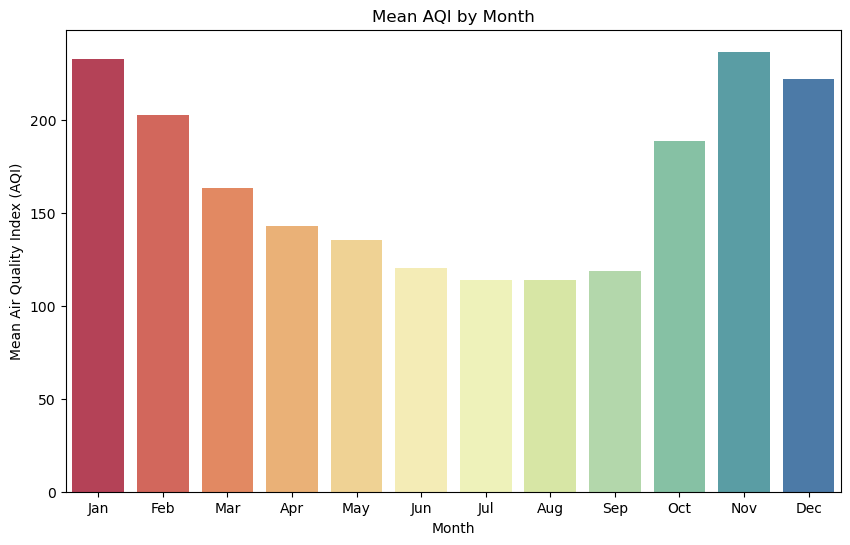

In [39]:
import matplotlib.pyplot as pl
import seaborn as ss
import pandas as pa
Nit_pat = "D:\AIT614\Project\Filled_data.csv"
a_Qua_Ind = pa.read_csv(Nit_pat)
a_Qua_Ind['Date'] = pa.to_datetime(a_Qua_Ind['Date'])
a_Qua_Ind['MonthName'] = a_Qua_Ind['Date'].dt.strftime('%b')
air_qua_index_month_avg = a_Qua_Ind.groupby('MonthName', sort=False)['AQI'].mean().reset_index()
pl.figure(figsize=(10, 6))
pal_colours = ss.color_palette("Spectral", len(air_qua_index_month_avg))
ch = ss.barplot(x='MonthName', y='AQI', data=air_qua_index_month_avg, palette=pal_colours)
ch.set_title('Mean AQI by Month')
ch.set_ylabel('Mean Air Quality Index (AQI)')
ch.set_xlabel('Month')

pl.show()


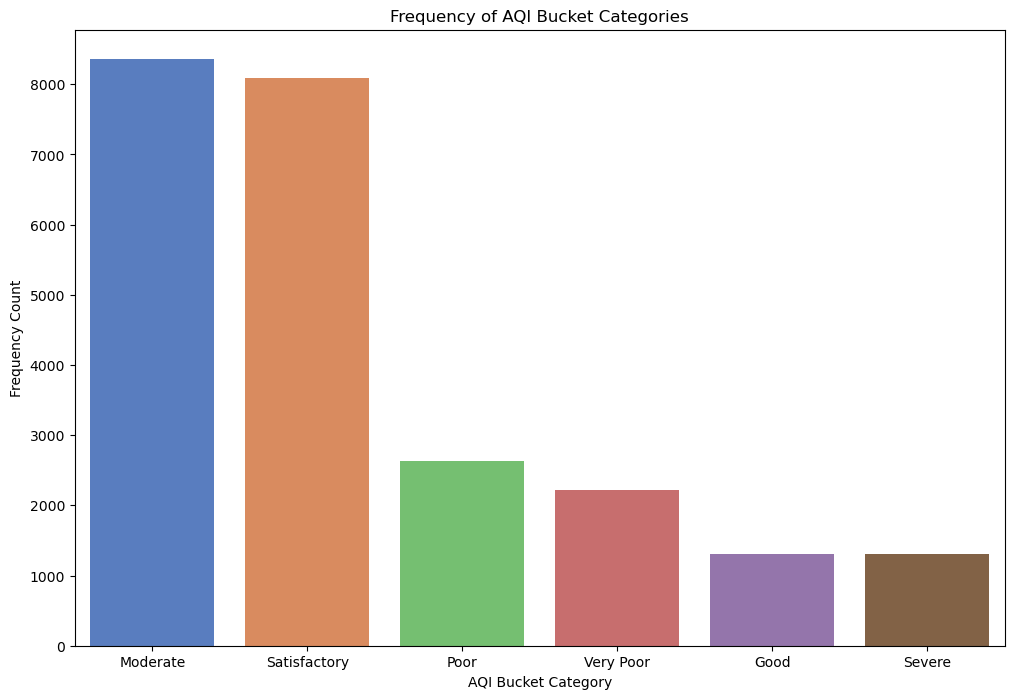

In [40]:
cat_num = a_Qua_Ind['AQI_Bucket'].value_counts().rename_axis('Category').reset_index(name='Frequency')
pl.figure(figsize=(12, 8))
cat_pale = ss.color_palette("muted", len(cat_num))
bp = ss.barplot(x='Category', y='Frequency', data=cat_num, palette=cat_pale)
bp.set_title('Frequency of AQI Bucket Categories')
bp.set_xlabel('AQI Bucket Category')
bp.set_ylabel('Frequency Count')

pl.show()

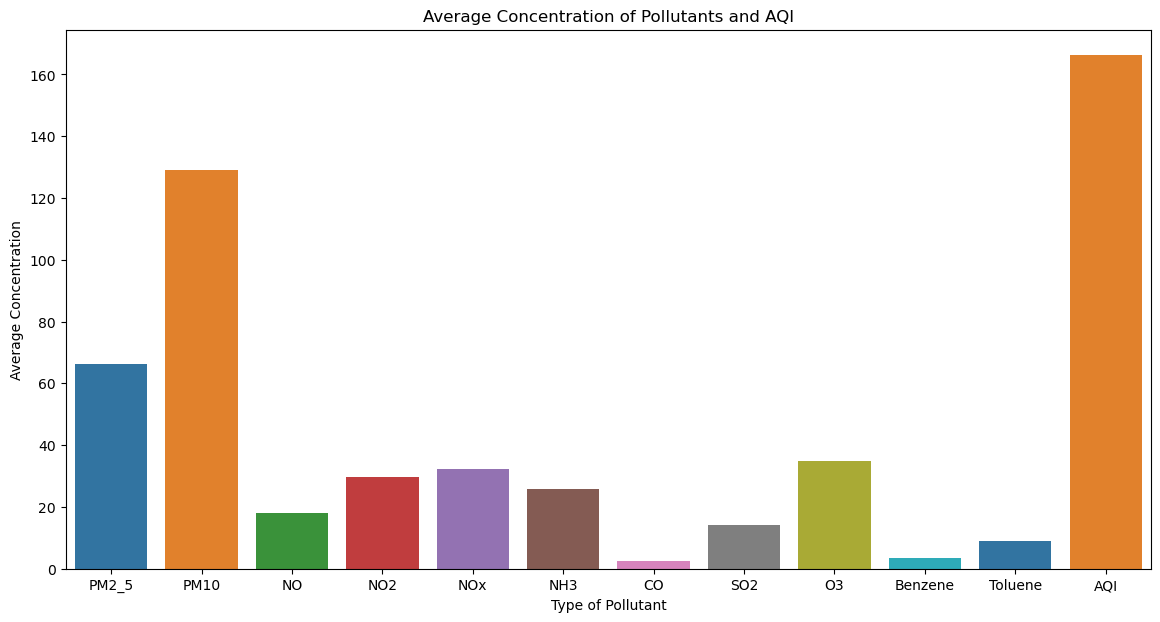

In [41]:
pol_aver = a_Qua_Ind[['PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']].mean().rename_axis('Pollutant').reset_index(name='Average')
pl.figure(figsize=(14,7))
pol_pal = ss.color_palette("tab10", n_colors=len(pol_aver))
ap = ss.barplot(x='Pollutant', y='Average', data=pol_aver, palette=pol_pal)
ap.set_title('Average Concentration of Pollutants and AQI')
ap.set_xlabel('Type of Pollutant')
ap.set_ylabel('Average Concentration')

pl.show()


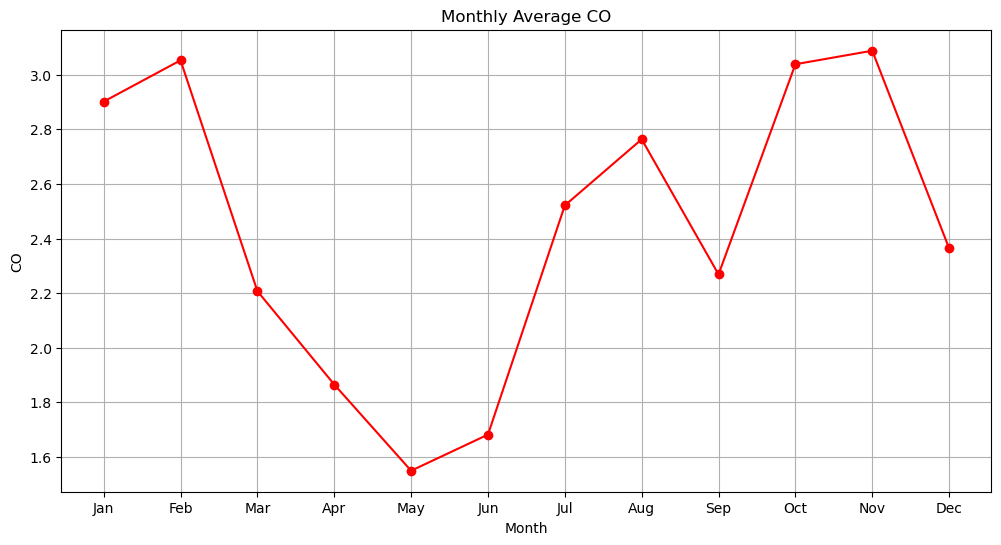

In [42]:
CO_avera_mon = a_Qua_Ind.groupby(a_Qua_Ind['Date'].dt.strftime('%b'))['CO'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
pl.figure(figsize=(12,6))
pl.plot(CO_avera_mon.index, CO_avera_mon.values, marker='o', color='red', linestyle='-')
pl.title('Monthly Average CO')
pl.ylabel('CO')
pl.xlabel('Month')
pl.grid(True)

pl.show()

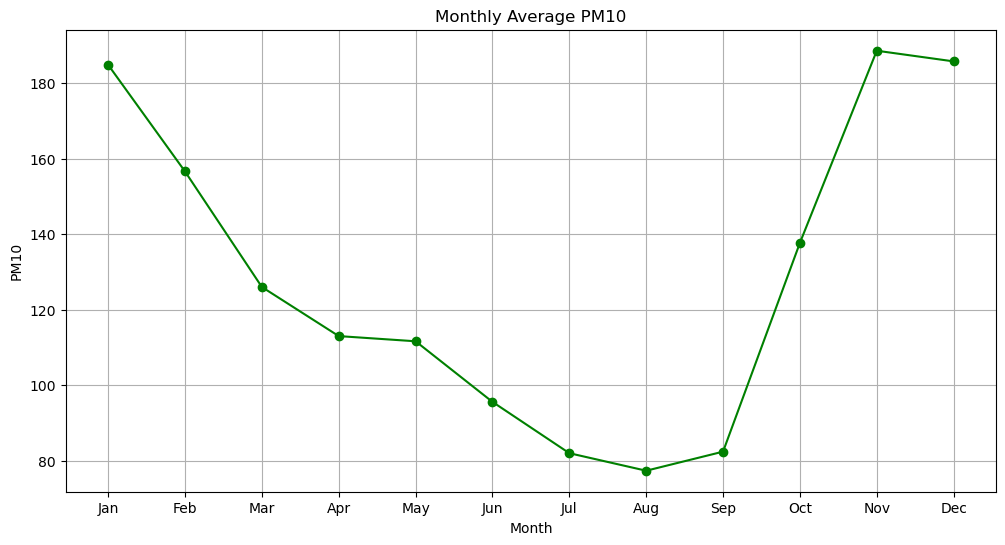

In [43]:
a_Qua_Ind['Date'] = pa.to_datetime(a_Qua_Ind['Date'])
PM10_avera_mon = a_Qua_Ind.groupby(a_Qua_Ind['Date'].dt.strftime('%b'))['PM10'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
pl.figure(figsize=(12,6))
pl.plot(PM10_avera_mon.index, PM10_avera_mon.values, marker='o', color='green', linestyle='-')
pl.title('Monthly Average PM10')
pl.ylabel('PM10')
pl.xlabel('Month')
pl.grid(True)

pl.show()

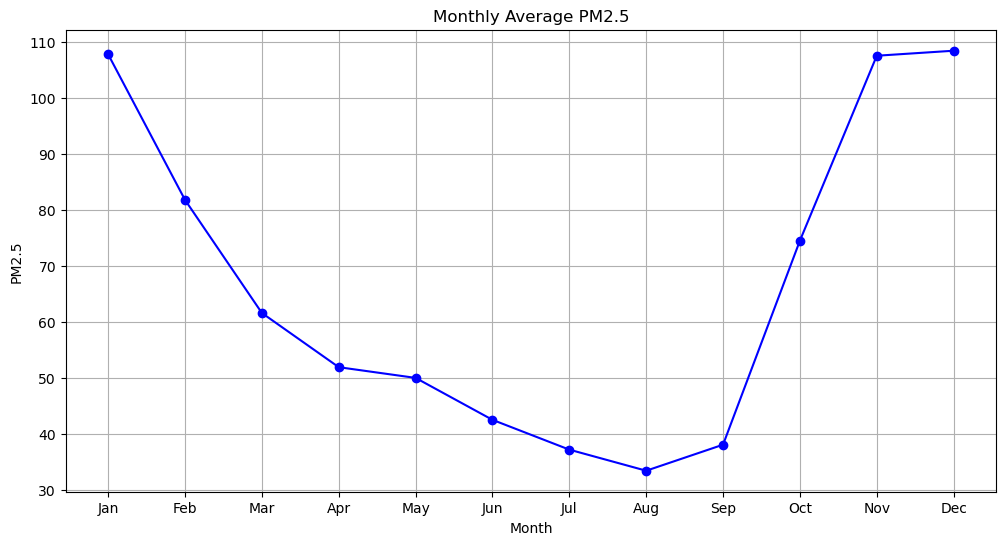

In [44]:
PM25_avera_mon = a_Qua_Ind.groupby(a_Qua_Ind['Date'].dt.strftime('%b'))['PM2_5'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
pl.figure(figsize=(12,6))
pl.plot(PM25_avera_mon.index, PM25_avera_mon.values, marker='o', color='blue', linestyle='-')
pl.title('Monthly Average PM2.5')
pl.ylabel('PM2.5')
pl.xlabel('Month')
pl.grid(True)

pl.show()

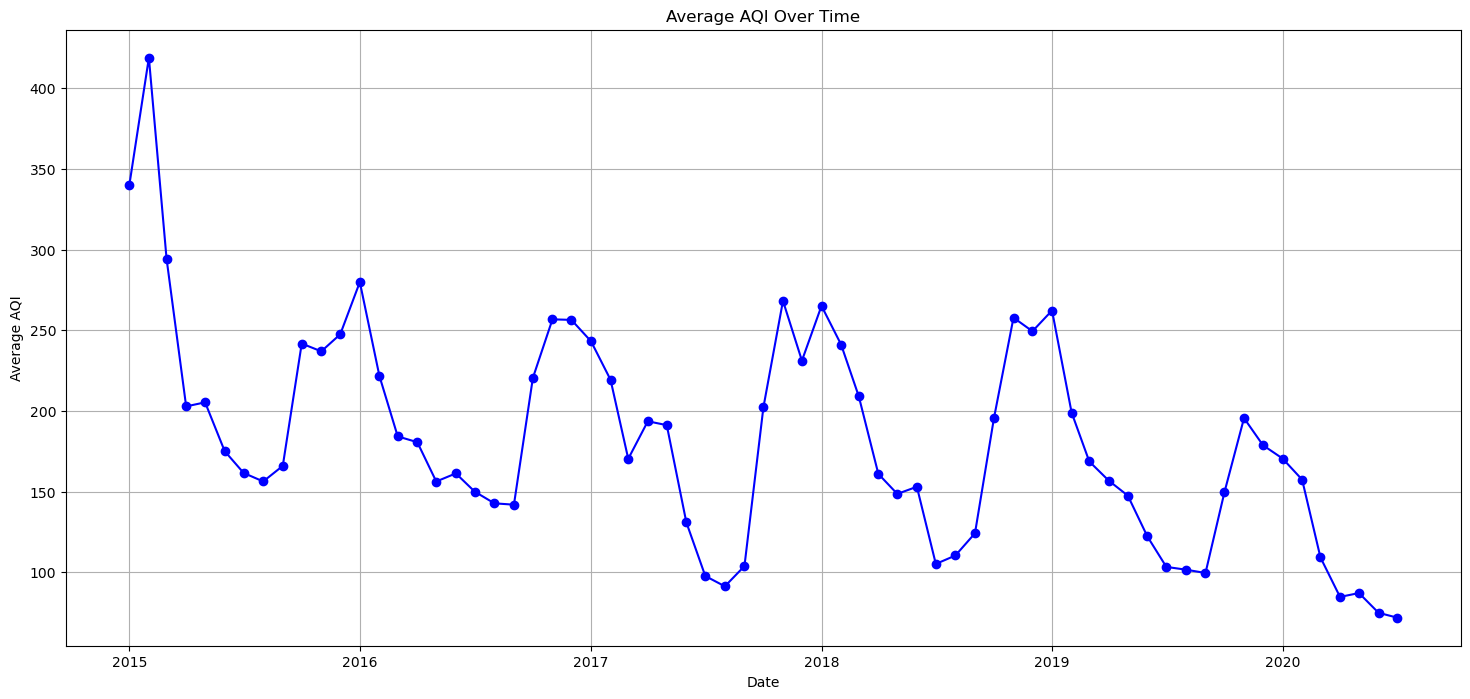

In [45]:
a_Qua_Ind['Date'] = pa.to_datetime(a_Qua_Ind['Date'])
a_Qua_Ind['AQI'] = pa.to_numeric(a_Qua_Ind['AQI'], errors='coerce')
a_Qua_Ind['AQI'].fillna(method='ffill', inplace=True)
a_Qua_Ind['YearMonth'] = a_Qua_Ind['Date'].dt.to_period('M')
aqi_avera_mon = a_Qua_Ind.groupby('YearMonth')['AQI'].mean().reset_index()
aqi_avera_mon['YearMonth'] = aqi_avera_mon['YearMonth'].dt.to_timestamp()
pl.figure(figsize=(18,8))
pl.plot(aqi_avera_mon['YearMonth'], aqi_avera_mon['AQI'], color='blue', marker='o')
pl.title('Average AQI Over Time')
pl.xlabel('Date')
pl.ylabel('Average AQI')
pl.grid(True)

pl.show()
